In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
city = pd.read_csv('data/city_data.csv')
city =city.set_index(['city'])
city.head()

,driver_count,type
city,,
Richardfort,38,Urban
Williamsstad,59,Urban
Port Angela,67,Urban
Rodneyfort,34,Urban
West Robert,39,Urban


In [11]:
ride = pd.read_csv('data/ride_data.csv')
ride.head() 

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [ ]:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [14]:
ride_by_city = ride.groupby('city').agg({'fare':'mean','ride_id':'count'})
ride_by_city.head()

,fare,ride_id
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [28]:
ride_info = ride_by_city.join(city)
ride_info.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [52]:
urban_avg_fare= ride_info.loc[ride_info['type']=='Urban']['fare']
urban_total_ride=ride_info.loc[ride_info['type']=='Urban']['ride_id']
urban_total_driver=ride_info.loc[ride_info['type']=='Urban']['driver_count']

suburban_avg_fare= ride_info.loc[ride_info['type']=='Suburban']['fare']
suburban_total_ride=ride_info.loc[ride_info['type']=='Suburban']['ride_id']
suburban_total_driver=ride_info.loc[ride_info['type']=='Suburban']['driver_count']

rural_avg_fare= ride_info.loc[ride_info['type']=='Rural']['fare']
rural_total_ride=ride_info.loc[ride_info['type']=='Rural']['ride_id']
rural_total_driver=ride_info.loc[ride_info['type']=='Rural']['driver_count']

Text(42, 35, 'Notes:\nCircle size is driver count per city')

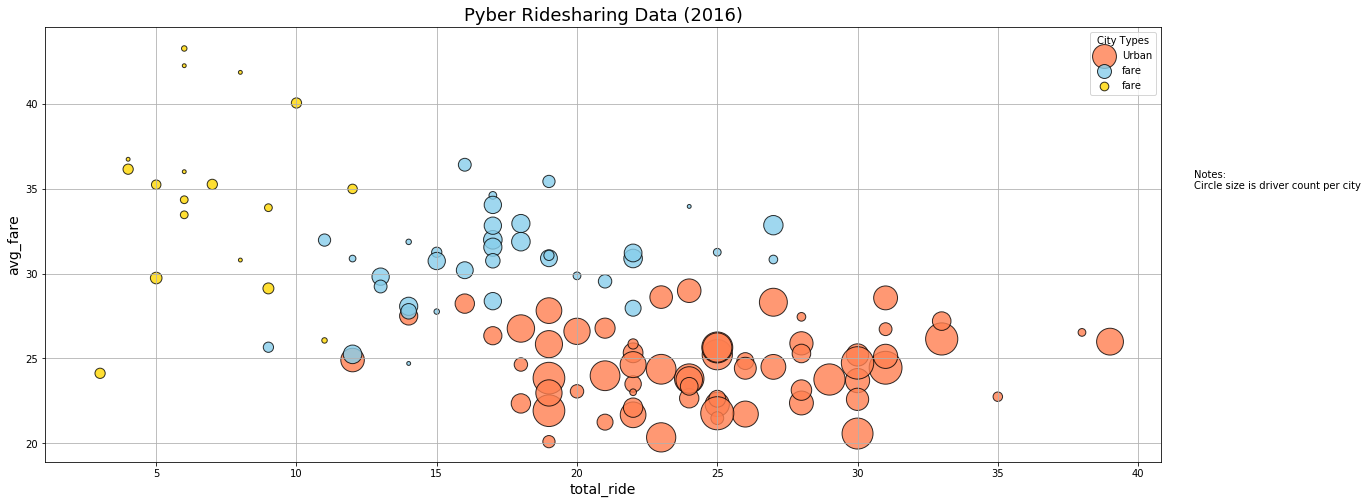

In [86]:
plt.figure(figsize=(20, 8))
urban=plt.scatter(urban_total_ride, urban_avg_fare, 
                  color='Coral', 
                 alpha=0.8,
                edgecolors='black',
                label="Urban",
                 s = urban_total_driver * 15)
suburban=plt.scatter(suburban_total_ride, suburban_avg_fare, 
                  color='skyblue', 
                 alpha=0.8,
            edgecolors='black',
                 s = suburban_total_driver * 15)
rural=plt.scatter(rural_total_ride, rural_avg_fare, 
                  color='gold', 
                 alpha=0.8,
            edgecolors='black',
                 s = rural_total_driver * 15)
plt.xlabel("total_ride", size=14)
plt.ylabel("avg_fare", size=14)
plt.title("Pyber Ridesharing Data (2016)",size=18)
plt.legend(loc="upper right")
plt.legend(handles=[urban, suburban, rural], title="City Types")
plt.grid(True)
plt.text(42,35, "Notes:\nCircle size is driver count per city")

In [93]:
combined = city.join(ride.set_index('city'))
combined.reset_index().head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


In [124]:
ride_by_type=combined.groupby('type').agg({'fare':'sum','ride_id':'count'}).sort_values(by='fare', ascending=False)
ride_by_type

,fare,ride_id
type,,
Urban,39854.38,1625
Suburban,19356.33,625
Rural,4327.93,125


Text(0.5, 1.0, '% of total fare by city type')

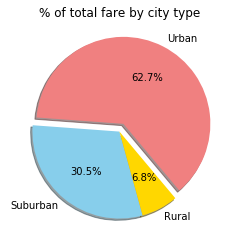

In [135]:
a = plt.pie(ride_by_type['fare'],labels=ride_by_type.index,shadow=True,startangle= -50,autopct='%1.1f%%',
        colors = ['lightcoral','skyblue','gold'],explode=(0.1,0,0))
plt.title('% of total fare by city type')

In [137]:
plt.savefig(a)

ValueError: fname must be a PathLike or file handle

<Figure size 432x288 with 0 Axes>